In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
crime_df = pd.read_csv('US_Crime_Data.csv')

In [3]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6783 entries, 0 to 6782
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          6783 non-null   object
 1   Title         6782 non-null   object
 2   Organization  6783 non-null   object
 3   City          5616 non-null   object
 4   State         5538 non-null   object
 5   URL           6783 non-null   object
 6   Keyword       5607 non-null   object
 7   Summary       4527 non-null   object
dtypes: object(8)
memory usage: 424.1+ KB


In [4]:
crime_df.head()

,Date,Title,Organization,City,State,URL,Keyword,Summary
0,2/13/17 9:01,Pizza Hut driver who killed co-worker with sho...,LGBTQ Nation,Phoenix,AZ,http://www.lgbtqnation.com/2017/02/man-accused...,NaN,NaN
1,2/13/17 9:37,Residents of NJ township receiving KKK promoti...,New York Daily News,NaN,NaN,http://www.nydailynews.com/news/national/resid...,NaN,NaN
2,2/13/17 15:37,House OKs bill to expand Kentucky's hate crime...,FOX19,Cincinnati,OH,http://www.fox19.com/story/34494432/house-oks-...,NaN,NaN
3,2/13/17 16:56,"Amid Protests, 'Blue Lives Matter' Bill Passes...",89.3 WFPL,Louisville,KY,http://wfpl.org/amid-protests-blue-lives-matte...,NaN,NaN
4,2/13/17 18:37,Lafourche inmates charged with hate crimes in ...,Daily Comet,Thibodaux,LA,http://www.dailycomet.com/news/20170213/lafour...,NaN,NaN


In [5]:
crime_df.isnull().sum() / len(crime_df)

Date            0.000000
Title           0.000147
Organization    0.000000
City            0.172048
State           0.183547
URL             0.000000
Keyword         0.173375
Summary         0.332596
dtype: float64

In [6]:
crime_df['Date'] = pd.to_datetime(crime_df['Date'])

In [7]:
crime_df['Title'].sample(10)

505     Blumenthal unveils bill to toughen federal hat...
305     Police investigate 'hate crime' in attack on S...
1308    Police: Organist spray painted 'Heil Trump,' s...
3781     Hate crimes are public health issue, doctors say
1065    Police chief: Fresno killings are a hate crime...
294     Sikh Man in Washington Says He Was Shot and To...
1593    FBI Investigating UMD Fatal Stabbing As Possib...
944     Woman in hate crime case convicted of criminal...
3513    NC man accused of hanging noose in neighbor's ...
5993    Black Man Who Vandalized His Own Car With Raci...
Name: Title, dtype: object

In [8]:
crime_df['Organization'].value_counts()

HuffPost                     128
Washington Post               76
Patch.com                     75
New York Daily News           66
Carbonated.tv                 59
                            ... 
Shepherd Express               1
WITN                           1
pocho.com                      1
The Milwaukee Independent      1
Sports Illustrated             1
Name: Organization, Length: 2241, dtype: int64

In [9]:
pd.set_option('display.max_rows', 7000)
crime_df['City'].value_counts()

New York                    875
Washington                  372
Los Angeles                 174
Chicago                     114
San Francisco               108
Portland                     79
Seattle                      75
Philadelphia                 62
San Diego                    60
San Ramon                    59
Atlanta                      55
Baltimore                    55
Indianapolis                 53
Hartford                     44
Houston                      42
Phoenix                      42
West Palm Beach              37
Milwaukee                    36
Sacramento                   35
Montgomery                   35
Kansas City                  34
Miami                        32
Washington DC                32
Brooklyn                     31
Tampa                        31
Cleveland                    30
Spokane                      29
Salt Lake City               29
Fort Wayne                   29
Albany                       29
Springfield                  28
Columbus

In [10]:
crime_df['State'].value_counts()

NY                         954
CA                         771
DC                         348
IL                         195
New York                   157
FL                         154
PA                         150
TX                         145
WA                         141
MA                         136
IN                         128
MI                         111
CT                         107
OH                         102
MD                          98
VA                          96
OR                          81
KS                          76
MO                          73
WI                          67
Florida                     65
MN                          62
GA                          62
NC                          61
NJ                          60
California                  56
TN                          56
AZ                          55
AL                          53
CO                          53
Texas                       46
KY                          43
UT      

In [11]:
crime_df[crime_df['State']=='South Carolina']['State']

66      South Carolina
1277    South Carolina
4292    South Carolina
4398    South Carolina
4472    South Carolina
4487    South Carolina
6337    South Carolina
Name: State, dtype: object

In [12]:
replace_entries = [
    ('New York', ['NY', 'New York', 'ny', 'New york', 'New York and California']),
    ('Alabama', ['AL', 'Alabama']),
    ('Alaska', ['AK', 'Alaska']),
    ('Arizona', ['AZ', 'Arizona']),
    ('Arkansas', ['AR', 'Arkansas']),
    ('American Samoa', ['AS']),
    ('California', ['CA', 'Ca', 'Los Angeles, California', 'Venice Beach, CA 90291', 'California']),
    ('Colorado', ['CO', 'Colorado']),
    ('Connecticut', ['CT', 'Connecticut']),
    ('Chicago', ['Chicago']),
    ('Delaware', ['DE', 'Delaware']),
    ('Florida', ['FL', 'florida', 'Florida']),
    ('Georgia', ['GA', 'Georgia']),
    ('Guam', ['GU']),
    ('Hawaii', ['HI']),
    ('Idaho', ['ID', 'Idaho']),
    ('Illinois', ['IL', 'Illinois']),
    ('Indiana', ['IN', 'Indiana']),
    ('Iowa', ['IA', 'IO', 'Iowa']),
    ('Kansas', ['KS', 'Kansas']),
    ('Kentucky', ['KY', 'Kentucky']),
    ('Louisiana', ['LA', 'Louisiana']),
    ('Maine', ['ME', 'Maine']),
    ('Maryland', ['MD', 'Maryland']),
    ('Massachusetts', ['MA', 'ma', 'Massachusetts']),
    ('Michigan', ['MI', 'mi', 'Michigan']),
    ('Minnesota', ['MN', 'Minnesota']),
    ('Mississippi', ['MS', 'Mississippi']),
    ('Missouri', ['MO', 'Missouri']),
    ('Montana', ['MT', 'Montana']),
    ('Nebraska', ['NE', 'Nebraska']),
    ('Nevada', ['NV', 'Nevada']),
    ('New Hampshire', ['NH', 'New Hampshire']),
    ('New Jersey', ['NJ', 'New Jersey']),
    ('New Mexico', ['NM', 'New Mexico']),
    ('New York', ['NY', 'New York']),
    ('North Carolina', ['NC', 'NORTH CAROLINA', 'North Carolina']),
    ('North Dakota', ['ND', 'North Dakota']),
    ('Northern Mariana Islands', ['MP']),
    ('Ohio', ['OH', 'Ohio']),
    ('Oklahoma', ['OK', 'Oklahoma']),
    ('Oregon', ['OR', 'Oregon']),
    ('Pennsylvania', ['PA', 'Pennsylvania']),
    ('Puerto Rico', ['PR']),
    ('Rhode Island', ['RI']),
    ('South Carolina', ['SC', 'S.C', 'South Carolina']),
    ('South Dakota', ['SD', 'South dakoda', 'South Dakota']),
    ('Tennessee', ['TN', 'Tennessee']),
    ('Texas', ['TX', 'tx', 'Texas']),
    ('Trust Territories', ['TT', 'Trust Territories']),
    ('Utah', ['UT', 'Utah']),
    ('Vermont', ['VT', 'Vermont']),
    ('Virginia', ['VA', 'Virginia', 'Alexandria VA']),
    ('Virgin Islands', ['VI']),
    ('Washington', ['WA', 'D.C.', 'Washington', 'DC', 'District of Columbia']),
    ('West Virginia', ['WV', 'West Virginia']),
    ('Wisconsin', ['WI', 'Wisconsin']),
    ('Wyoming', ['WY', 'wy', 'Wyoming'])
]

In [13]:
import re

def extract_city(city_raw):
    rgx = r'([\w\s]+)\s[Cc]ity$'
    ret_str = ''
    if pd.notnull(city_raw):
        try:
            ret_str = re.search(rgx, city_raw).group(1)
        except AttributeError:
            ret_str = city_raw

        return ret_str.strip().title().replace('Of', 'of')
    else:
        return city_raw

In [14]:
extract_city('City of Montrose')

'City of Montrose'

In [15]:

week_type = pd.api.types.CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
month_type = pd.api.types.CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
hour_type = pd.api.types.CategoricalDtype(categories=['12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM',
                                                      '08 AM', '09 AM', '10 AM', '11 AM', '12 PM', '01 PM', '02 PM', '03 PM',
                                                      '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM'], ordered=True)


def extract_date_info(df):
    """
        Extracts time information from a DateTime Series
    """
    df['month'] = df['Date'].dt.month_name()
    df['month'] = df['month'].astype(month_type)
    df['weekday'] = df['Date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(week_type)
    df['quarter'] = df['Date'].dt.quarter
    df['hour'] = df['Date'].apply(lambda x: x.strftime("%I %p")).astype(hour_type)

In [16]:
extract_date_info(crime_df)

In [17]:
set(crime_df['hour'])

{'01 AM',
 '01 PM',
 '02 AM',
 '02 PM',
 '03 AM',
 '03 PM',
 '04 AM',
 '04 PM',
 '05 AM',
 '05 PM',
 '06 AM',
 '06 PM',
 '07 AM',
 '07 PM',
 '08 AM',
 '08 PM',
 '09 AM',
 '09 PM',
 '10 AM',
 '10 PM',
 '11 AM',
 '11 PM',
 '12 AM',
 '12 PM'}

In [18]:
for value, to_replace in replace_entries:
    crime_df['State'].replace(to_replace=to_replace, value=value, inplace=True)

In [19]:
crime_df['State'].value_counts()

New York          1117
California         835
Washington         548
Florida            220
Illinois           209
Texas              193
Pennsylvania       153
Indiana            151
Massachusetts      139
Michigan           126
Maryland           124
Connecticut        112
Ohio               110
Virginia           110
Oregon             101
Wisconsin           85
Missouri            83
Georgia             82
Kansas              79
New Jersey          77
North Carolina      68
Tennessee           67
Colorado            66
Arizona             65
Minnesota           62
Alabama             56
Kentucky            44
Utah                43
South Carolina      38
Montana             36
Idaho               35
Iowa                31
North Dakota        27
Maine               24
Nevada              22
Oklahoma            20
Delaware            20
Louisiana           20
Mississippi         19
Rhode Island        14
South Dakota        14
New Hampshire       14
Vermont             13
West Virgin

In [20]:
#set(crime_df['State'].value_counts().index).difference(set(np.array(replace_entries)[:,0]))

In [21]:
crime_df['City'] = crime_df['City'].apply(extract_city)

In [22]:
crime_df.head()

,Date,Title,Organization,City,State,URL,Keyword,Summary,month,weekday,quarter,hour
0,2017-02-13 09:01:00,Pizza Hut driver who killed co-worker with sho...,LGBTQ Nation,Phoenix,Arizona,http://www.lgbtqnation.com/2017/02/man-accused...,NaN,NaN,February,Monday,1,09 AM
1,2017-02-13 09:37:00,Residents of NJ township receiving KKK promoti...,New York Daily News,NaN,NaN,http://www.nydailynews.com/news/national/resid...,NaN,NaN,February,Monday,1,09 AM
2,2017-02-13 15:37:00,House OKs bill to expand Kentucky's hate crime...,FOX19,Cincinnati,Ohio,http://www.fox19.com/story/34494432/house-oks-...,NaN,NaN,February,Monday,1,03 PM
3,2017-02-13 16:56:00,"Amid Protests, 'Blue Lives Matter' Bill Passes...",89.3 WFPL,Louisville,Kentucky,http://wfpl.org/amid-protests-blue-lives-matte...,NaN,NaN,February,Monday,1,04 PM
4,2017-02-13 18:37:00,Lafourche inmates charged with hate crimes in ...,Daily Comet,Thibodaux,Louisiana,http://www.dailycomet.com/news/20170213/lafour...,NaN,NaN,February,Monday,1,06 PM


In [23]:
crime_df.isna().sum()

Date               0
Title              1
Organization       0
City            1167
State           1245
URL                0
Keyword         1176
Summary         2256
month              0
weekday            0
quarter            0
hour               0
dtype: int64

There are some missing values in the data columns which I will replace as follows

In [24]:
def replace_null(df):
    for col in ['Title', 'City', 'State', 'Keyword', 'Summary']:
        df[col].fillna('Unknown', inplace=True)

In [25]:
replace_null(crime_df)

In [26]:
crime_df.isna().sum()

Date            0
Title           0
Organization    0
City            0
State           0
URL             0
Keyword         0
Summary         0
month           0
weekday         0
quarter         0
hour            0
dtype: int64

In [27]:
crime_df.head()

,Date,Title,Organization,City,State,URL,Keyword,Summary,month,weekday,quarter,hour
0,2017-02-13 09:01:00,Pizza Hut driver who killed co-worker with sho...,LGBTQ Nation,Phoenix,Arizona,http://www.lgbtqnation.com/2017/02/man-accused...,Unknown,Unknown,February,Monday,1,09 AM
1,2017-02-13 09:37:00,Residents of NJ township receiving KKK promoti...,New York Daily News,Unknown,Unknown,http://www.nydailynews.com/news/national/resid...,Unknown,Unknown,February,Monday,1,09 AM
2,2017-02-13 15:37:00,House OKs bill to expand Kentucky's hate crime...,FOX19,Cincinnati,Ohio,http://www.fox19.com/story/34494432/house-oks-...,Unknown,Unknown,February,Monday,1,03 PM
3,2017-02-13 16:56:00,"Amid Protests, 'Blue Lives Matter' Bill Passes...",89.3 WFPL,Louisville,Kentucky,http://wfpl.org/amid-protests-blue-lives-matte...,Unknown,Unknown,February,Monday,1,04 PM
4,2017-02-13 18:37:00,Lafourche inmates charged with hate crimes in ...,Daily Comet,Thibodaux,Louisiana,http://www.dailycomet.com/news/20170213/lafour...,Unknown,Unknown,February,Monday,1,06 PM


In [28]:
crime_df['Keyword'][1000]

'appalled biden chechnya condemning degeneres disgusted gay joe lgbtq men russia trump vice_president'

In [29]:
crime_df['list of keywords'] = crime_df['Keyword'].apply(lambda x: list(set(x.split())))

In [30]:
crime_df['URL'].isna().sum()

0

In [31]:
# I want to extract the news provider from the 'URL' column so I want to get the list of all possible website domain ending like .com e.t.c

In [32]:
def extract_web_domain_end(x):
    rgx = r'https{0,1}://(w{0,3}\.|)[\w\.-]+(\.\w+)/+?'
    return re.search(rgx, x).group(2)

In [33]:
crime_df['domain_end'] = crime_df['URL'].apply(extract_web_domain_end)

In [34]:
crime_df['URL'][42]

'http://www.argus-press.com/news/state_news/article_e6e90df3-dc8c-572f-934e-3925b7dff9a5.html'

In [35]:
extract_web_domain_end(crime_df['URL'][42])

'.com'

In [36]:
available_domain_ends = set(crime_df['domain_end'])

In [37]:
available_domain_ends

{'.biz',
 '.blog',
 '.ca',
 '.com',
 '.de',
 '.edu',
 '.eu',
 '.fm',
 '.gov',
 '.in',
 '.info',
 '.is',
 '.me',
 '.mn',
 '.net',
 '.news',
 '.nyc',
 '.org',
 '.today',
 '.tv',
 '.uk',
 '.us'}

In [38]:
def extract_news_provider(x):
    rgx = r'https{0,1}://(w{0,3}\.|)([\w\.-]+)(\.(biz|blog|ca|com|de|edu|eu|fm|gov|in|info|is|me|mn|net|news|nyc|org|today|tv|uk|us))/+?'
    return re.search(rgx, x).group(2)

In [39]:
crime_df['news provider'] = crime_df['URL'].apply(extract_news_provider)

In [40]:
crime_df['news provider'].value_counts()

huffingtonpost                      144
patch                                75
washingtonpost                       75
nydailynews                          65
youtube                              58
carbonated                           57
newsweek                             42
usnews                               36
dailycaller                          36
splcenter                            34
chicagotribune                       31
nytimes                              31
abcnews.go                           29
mic                                  29
latimes                              27
lgbtqnation                          26
nbcnews                              26
theroot                              25
cnn                                  25
salon                                24
revealnews                           24
indiawest                            24
cbsnews                              23
bbc                                  23
nypost                               22


In [41]:
crime_df.drop(['URL', 'Title', 'Keyword', 'Summary'], axis=1, inplace=True)

In [42]:
crime_df.head()

,Date,Organization,City,State,month,weekday,quarter,hour,list of keywords,domain_end,news provider
0,2017-02-13 09:01:00,LGBTQ Nation,Phoenix,Arizona,February,Monday,1,09 AM,[Unknown],.com,lgbtqnation
1,2017-02-13 09:37:00,New York Daily News,Unknown,Unknown,February,Monday,1,09 AM,[Unknown],.com,nydailynews
2,2017-02-13 15:37:00,FOX19,Cincinnati,Ohio,February,Monday,1,03 PM,[Unknown],.com,fox19
3,2017-02-13 16:56:00,89.3 WFPL,Louisville,Kentucky,February,Monday,1,04 PM,[Unknown],.org,wfpl
4,2017-02-13 18:37:00,Daily Comet,Thibodaux,Louisiana,February,Monday,1,06 PM,[Unknown],.com,dailycomet


In [43]:
crime_df.set_index('Date', inplace=True)

### Exploratory Data Analysis

In [44]:
crime_df.head()

,Organization,City,State,month,weekday,quarter,hour,list of keywords,domain_end,news provider
Date,,,,,,,,,,
2017-02-13 09:01:00,LGBTQ Nation,Phoenix,Arizona,February,Monday,1,09 AM,[Unknown],.com,lgbtqnation
2017-02-13 09:37:00,New York Daily News,Unknown,Unknown,February,Monday,1,09 AM,[Unknown],.com,nydailynews
2017-02-13 15:37:00,FOX19,Cincinnati,Ohio,February,Monday,1,03 PM,[Unknown],.com,fox19
2017-02-13 16:56:00,89.3 WFPL,Louisville,Kentucky,February,Monday,1,04 PM,[Unknown],.org,wfpl
2017-02-13 18:37:00,Daily Comet,Thibodaux,Louisiana,February,Monday,1,06 PM,[Unknown],.com,dailycomet


#### Question 1: Which organizations and providers report crime news most frequently?

In [45]:
def plot_most_frequent(series, title, xlabel, start_ind=0, col_ind=0):
    fig, ax = plt.subplots(figsize=(20,8))
    series[start_ind:10].plot(kind='bar', color=sns.color_palette()[col_ind], ax=ax)
    plt.xticks(rotation=15)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

In [46]:
org_occurences = crime_df['Organization'].value_counts()

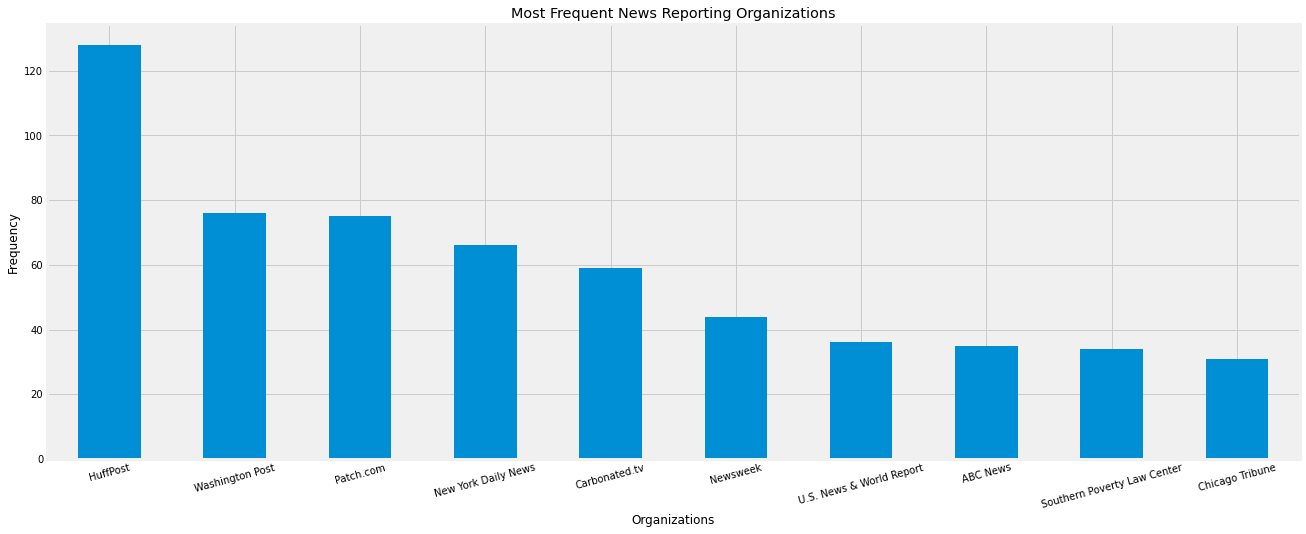

In [47]:
plot_most_frequent(org_occurences, 'Most Frequent News Reporting Organizations', 'Organizations')

In [48]:
prov_occurences = crime_df['news provider'].value_counts()

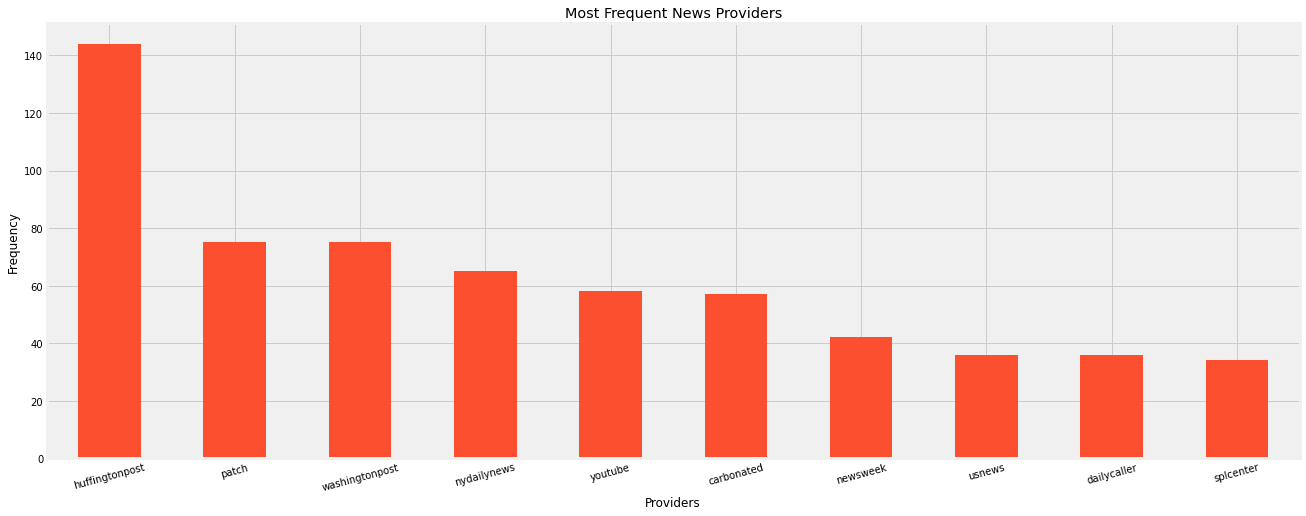

In [49]:
plot_most_frequent(prov_occurences, 'Most Frequent News Providers', 'Providers', col_ind=1)

#### Question 2: In which states do crimes occur most frequently?

In [50]:
state_crime_dist = crime_df['State'].value_counts()

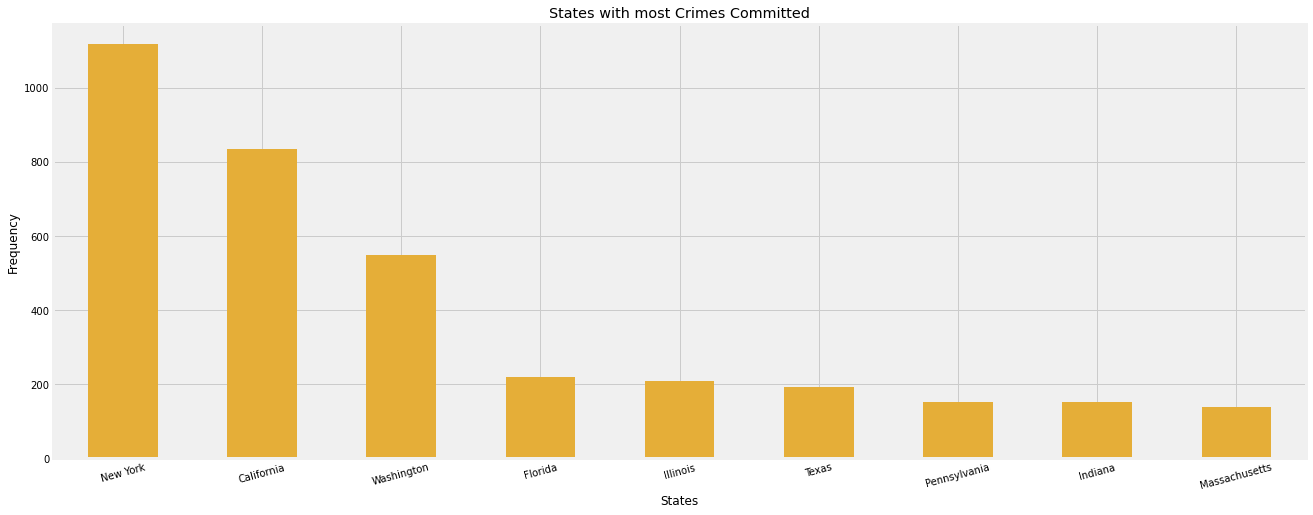

In [51]:
plot_most_frequent(state_crime_dist, 'States with most Crimes Committed', 'States', start_ind=1, col_ind=2)

#### Question 3: In which cities do crimes occur most frequently?

In [52]:
city_crime_dist = crime_df['City'].value_counts()

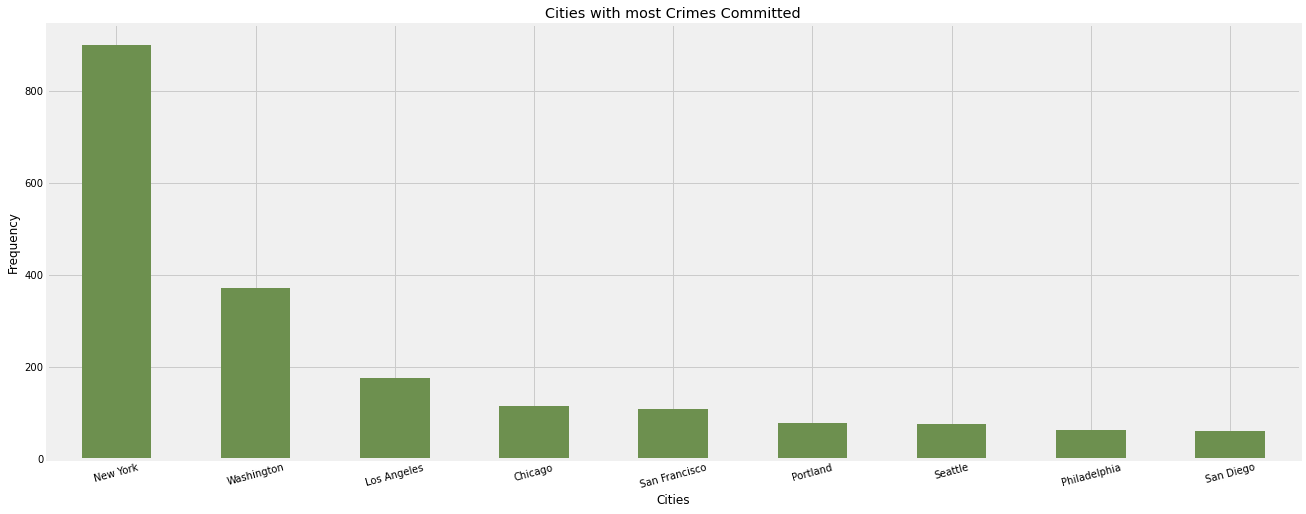

In [53]:
plot_most_frequent(city_crime_dist, 'Cities with most Crimes Committed', 'Cities', start_ind=1, col_ind=3)

#### Question 4: What is the frequency of crimes committed by month?

In [54]:
month_crime_dist = crime_df['month'].value_counts()

In [55]:
month_type

CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November',
                  'December'],
, ordered=True)

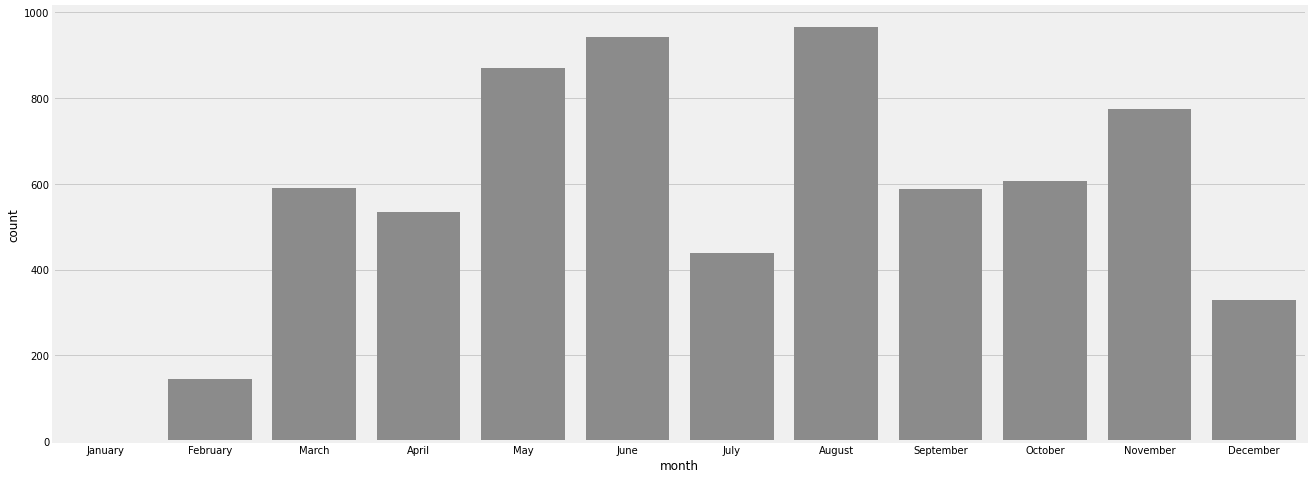

In [56]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=crime_df, x='month', color=sns.color_palette()[4], ax=ax)
plt.show()

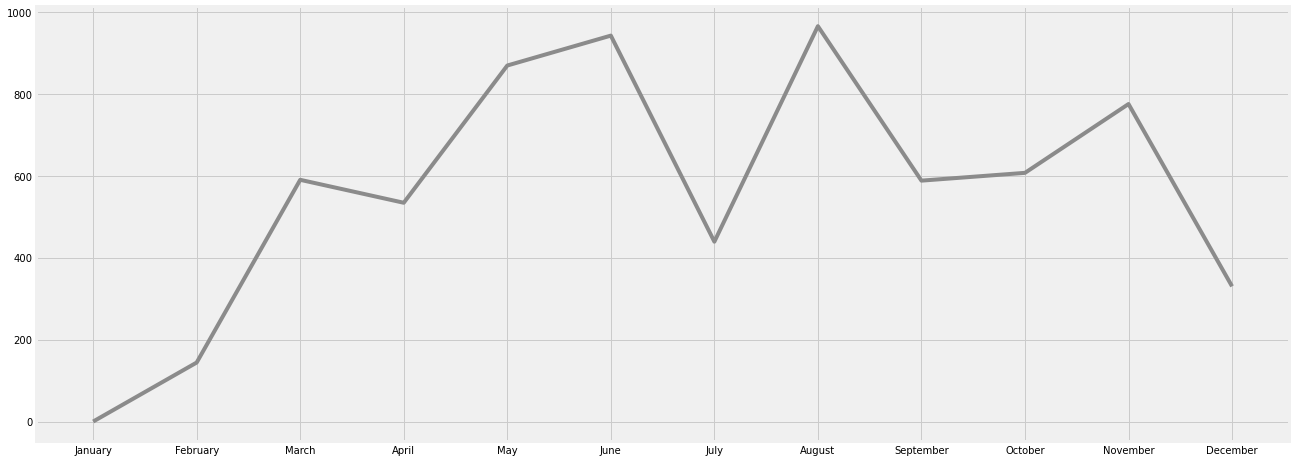

In [57]:
crime_count_by_month = crime_df['month'].value_counts()

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x=crime_count_by_month.index, y=crime_count_by_month.values, color=sns.color_palette()[4])
plt.show()

#### Question 5: What is the frequency of crimes committed by day?

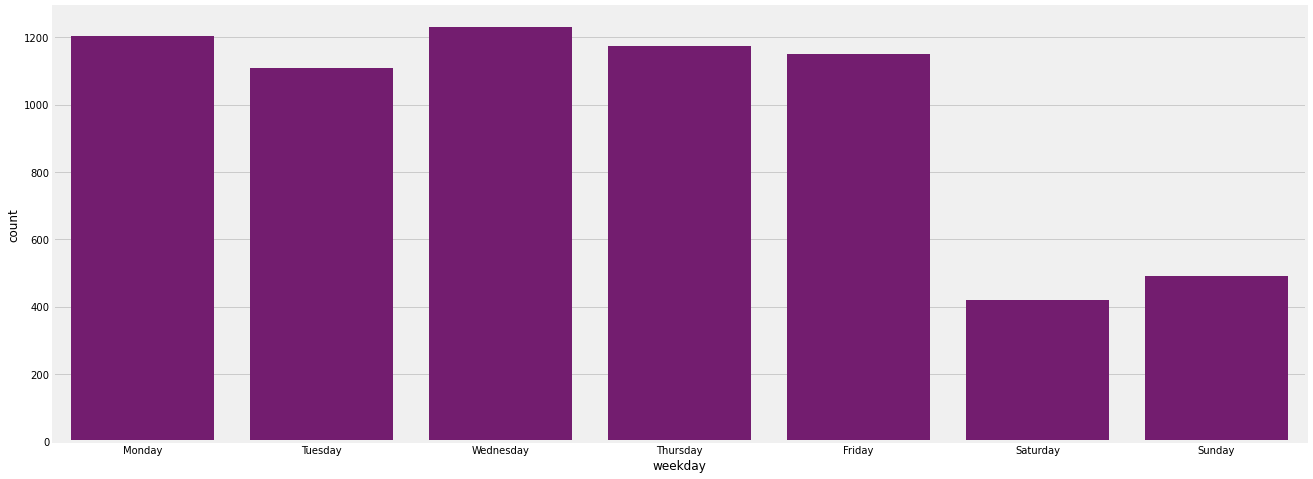

In [58]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=crime_df, x='weekday', color=sns.color_palette()[5], ax=ax)
plt.show()

#### Question 6: What is the frequency of crimes committed by quarter of the year?

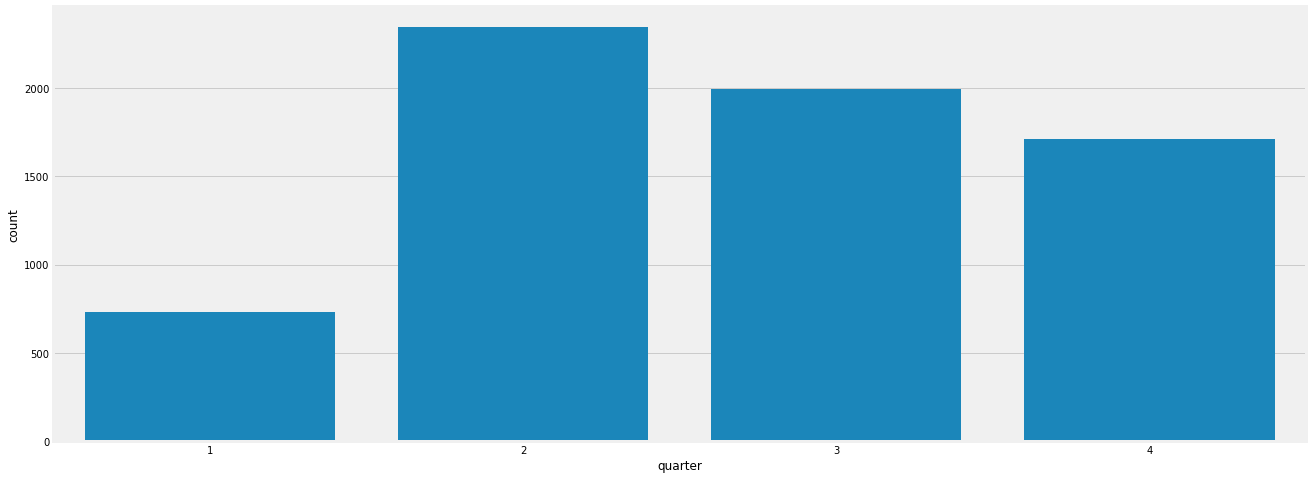

In [59]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=crime_df, x='quarter', color=sns.color_palette()[0], ax=ax)
plt.show()

#### Question 7: What is the frequency of crimes committed by hour of the day?

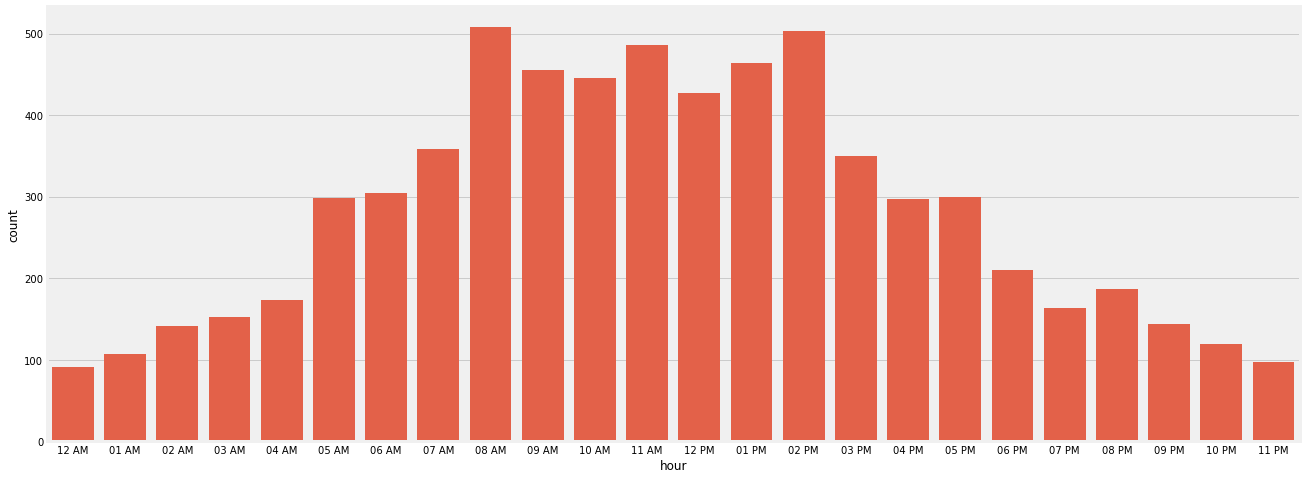

In [60]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=crime_df, x='hour', color=sns.color_palette()[1], ax=ax)
plt.show()

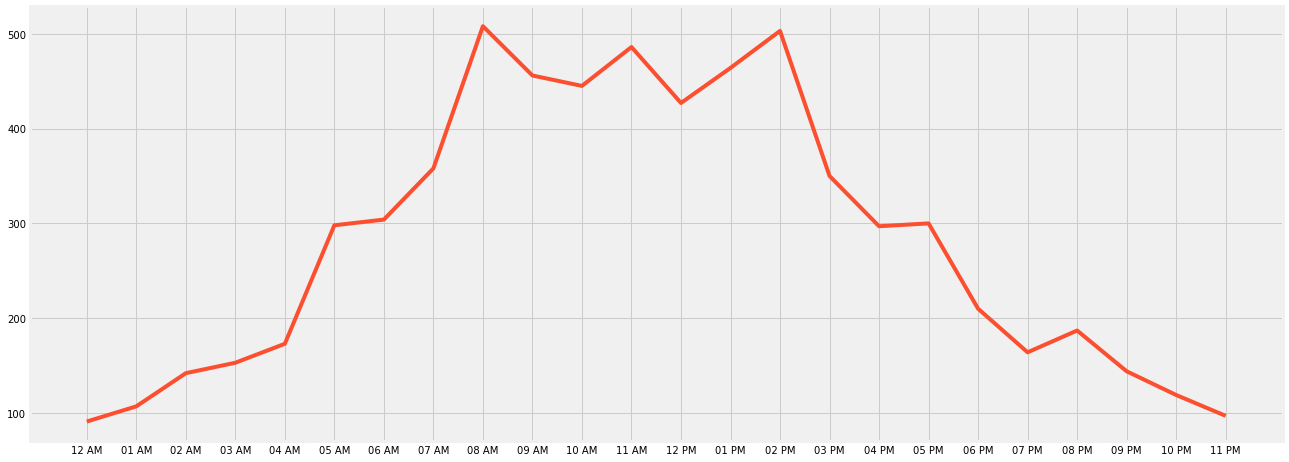

In [61]:
crime_count_by_hour = crime_df['hour'].value_counts()

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x=crime_count_by_hour.index, y=crime_count_by_hour.values, color=sns.color_palette()[1])
plt.show()

#### Question 8: What words appear most frequently in the crime news Keywords?

In [63]:
from collections import defaultdict


keyword_freq = defaultdict(int)

for list_of_keywords in crime_df['list of keywords'].values:
    for value in list_of_keywords:
        if value != 'Unknown':
            keyword_freq[value] += 1

keyword_freq = dict(sorted(keyword_freq.items(), key=lambda item: item[1], reverse=True))

In [64]:
keyword_freq

{'hate': 3623,
 'crime': 1466,
 'police': 1305,
 'crimes': 1292,
 'american': 824,
 'muslim': 812,
 'trump': 633,
 'university': 590,
 'state': 514,
 'fbi': 488,
 'attorney': 444,
 'islamic': 380,
 'charlottesville': 362,
 'victims': 361,
 'justice': 357,
 'attack': 343,
 'city': 338,
 'africa': 334,
 'anti': 328,
 'murder': 328,
 'incidents': 326,
 'racist': 323,
 'virginia': 313,
 'president': 312,
 'jewish': 310,
 'maryland': 308,
 'york': 303,
 'transgender': 301,
 'law': 295,
 'facebook': 289,
 'gay': 283,
 'donald': 282,
 'students': 282,
 'white': 268,
 'black': 263,
 'collins': 263,
 'mosque': 259,
 'bias': 252,
 'urbanski': 234,
 'teen': 232,
 'california': 230,
 'district': 220,
 'portland': 218,
 'stabbing': 209,
 'general': 208,
 'office': 203,
 'campus': 192,
 'racism': 183,
 'charges': 182,
 'semitic': 181,
 'james': 180,
 'lgbt': 177,
 'united': 177,
 'court': 174,
 'bowie': 174,
 'slurs': 173,
 'vandalism': 171,
 'racial': 171,
 'violence': 170,
 'park': 169,
 'suspect'

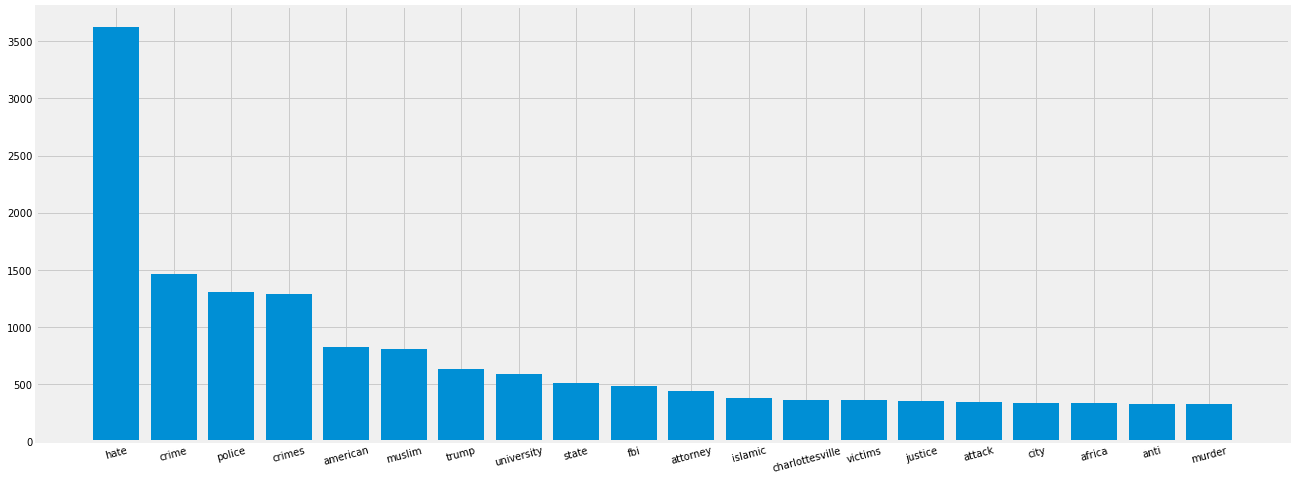

In [65]:
fig, ax = plt.subplots(figsize=(20,8))
plt.bar(x=list(keyword_freq.keys())[:20], height=list(keyword_freq.values())[:20])
plt.xticks(rotation=15)
plt.show()